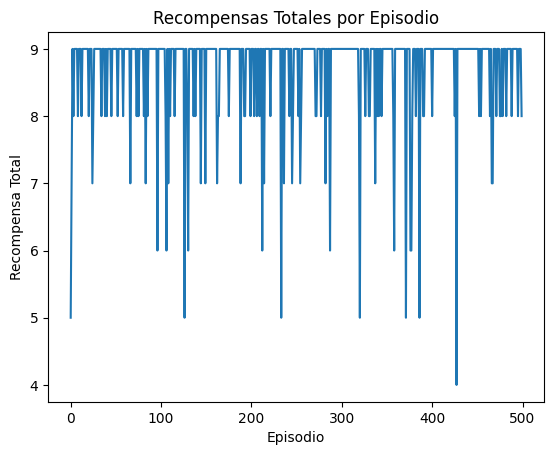

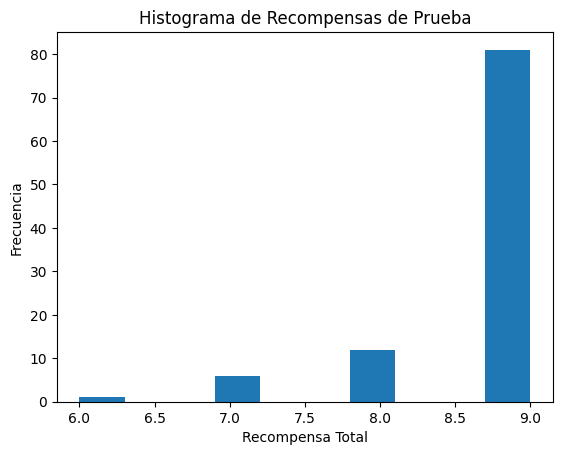

Política Óptima: {'A': 'derecha', 'B': 'derecha', 'C': 'izquierda'}
Valores Q Óptimos: {'A': array([3.84454992, 6.45840589]), 'B': array([ 3.17938626, 10.        ]), 'C': array([0., 0.])}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

class AmbienteABC:
    def __init__(self):
        self.estado_actual = 'A'
        self.finalizado = False

    def reiniciar(self):
        self.estado_actual = 'A'
        self.finalizado = False
        return self.estado_actual

    def paso(self, accion):
        if self.finalizado:
            return self.estado_actual, 0, self.finalizado

        if self.estado_actual == 'A':
            if accion == 'izquierda':
                proximo_estado = 'A'
                recompensa = -1
            else:
                if np.random.rand() < 0.9:
                    proximo_estado = 'B'
                else:
                    proximo_estado = 'A'
                recompensa = -1

        elif self.estado_actual == 'B':
            if accion == 'izquierda':
                proximo_estado = 'A'
                recompensa = -1
            else:
                proximo_estado = 'C'
                recompensa = 10
                self.finalizado = True

        self.estado_actual = proximo_estado
        return proximo_estado, recompensa, self.finalizado

class AgenteSARSA:
    def __init__(self, alfa=0.1, gamma=0.8, epsilon=0.1):
        self.Q = defaultdict(lambda: np.zeros(2))
        self.alfa = alfa
        self.gamma = gamma
        self.epsilon = epsilon
        self.espacio_de_accion = ['izquierda', 'derecha']

    def elegir_accion(self, estado):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.espacio_de_accion)
        else:
            return self.espacio_de_accion[np.argmax(self.Q[estado])]

    def aprender(self, estado, accion, recompensa, proximo_estado, proxima_accion):
        actual = self.Q[estado][self.espacio_de_accion.index(accion)]
        Q_siguiente = self.Q[proximo_estado][self.espacio_de_accion.index(proxima_accion)]
        objetivo = recompensa + self.gamma * Q_siguiente
        self.Q[estado][self.espacio_de_accion.index(accion)] += self.alfa * (objetivo - actual)

n_episodios = 500
recompensas_totales = []

ambiente = AmbienteABC()
agente = AgenteSARSA()

for episodio in range(n_episodios):
    estado = ambiente.reiniciar()
    accion = agente.elegir_accion(estado)
    recompensa_total = 0

    while True:
        proximo_estado, recompensa, finalizado = ambiente.paso(accion)
        proxima_accion = agente.elegir_accion(proximo_estado)
        agente.aprender(estado, accion, recompensa, proximo_estado, proxima_accion)

        recompensa_total += recompensa
        estado = proximo_estado
        accion = proxima_accion

        if finalizado:
            break

    recompensas_totales.append(recompensa_total)

plt.plot(recompensas_totales)
plt.title('Recompensas Totales por Episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

recompensas_de_prueba = []

for _ in range(100):
    estado = ambiente.reiniciar()
    recompensa_total = 0

    while True:
        accion = agente.elegir_accion(estado)
        estado, recompensa, finalizado = ambiente.paso(accion)
        recompensa_total += recompensa

        if finalizado:
            break

    recompensas_de_prueba.append(recompensa_total)

plt.hist(recompensas_de_prueba, bins=10)
plt.title('Histograma de Recompensas de Prueba')
plt.xlabel('Recompensa Total')
plt.ylabel('Frecuencia')
plt.show()

politica_optima = {estado: agente.espacio_de_accion[np.argmax(agente.Q[estado])] for estado in 'ABC'}
valores_Q_optimos = dict(agente.Q)

print("Política Óptima:", politica_optima)
print("Valores Q Óptimos:", valores_Q_optimos)
